In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Project Analysis\\India_MajorCity1881_2012.csv")
df.head()

,dt,Avg_Temp,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1881-01-01,19.883,0.570,Ahmadabad,India,23.31N,72.52E
1,1881-01-01,21.798,1.181,Bangalore,India,12.05N,77.26E
2,1881-01-01,24.511,0.853,Bombay,India,18.48N,72.68E
3,1881-01-01,17.665,0.497,Calcutta,India,23.31N,88.25E
4,1881-01-01,14.285,0.737,Delhi,India,28.13N,77.27E


In [3]:
df.tail()

,dt,Avg_Temp,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
22288,2012-12-01,26.222,0.873,Madras,India,13.66N,80.09E
22289,2012-12-01,20.465,0.910,Nagpur,India,21.70N,78.75E
22290,2012-12-01,16.566,0.427,New Delhi,India,28.13N,77.27E
22291,2012-12-01,21.747,0.498,Pune,India,18.48N,74.37E
22292,2012-12-01,22.504,0.578,Surat,India,21.70N,73.56E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             22293 non-null  object 
 1   Avg_Temp                       22280 non-null  float64
 2   AverageTemperatureUncertainty  22280 non-null  float64
 3   City                           22293 non-null  object 
 4   Country                        22293 non-null  object 
 5   Latitude                       22293 non-null  object 
 6   Longitude                      22293 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


In [5]:
df['dt']=pd.to_datetime(df['dt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             22293 non-null  datetime64[ns]
 1   Avg_Temp                       22280 non-null  float64       
 2   AverageTemperatureUncertainty  22280 non-null  float64       
 3   City                           22293 non-null  object        
 4   Country                        22293 non-null  object        
 5   Latitude                       22293 non-null  object        
 6   Longitude                      22293 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.2+ MB


In [6]:
#Check Zero Values
print((df==0).sum())

dt                               0
Avg_Temp                         0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


In [7]:
# Remove not usefull columns

df1 = df.drop(['AverageTemperatureUncertainty'], axis=1)

In [8]:
df1.isna().sum()

dt            0
Avg_Temp     13
City          0
Country       0
Latitude      0
Longitude     0
dtype: int64

In [9]:
df2=df1[df1['City']=='Bombay']
df2.head()

,dt,Avg_Temp,City,Country,Latitude,Longitude
2,1881-01-01,24.511,Bombay,India,18.48N,72.68E
16,1881-02-01,24.744,Bombay,India,18.48N,72.68E
30,1881-03-01,25.499,Bombay,India,18.48N,72.68E
44,1881-04-01,27.303,Bombay,India,18.48N,72.68E
58,1881-05-01,29.224,Bombay,India,18.48N,72.68E


TypeError: 'module' object is not callable

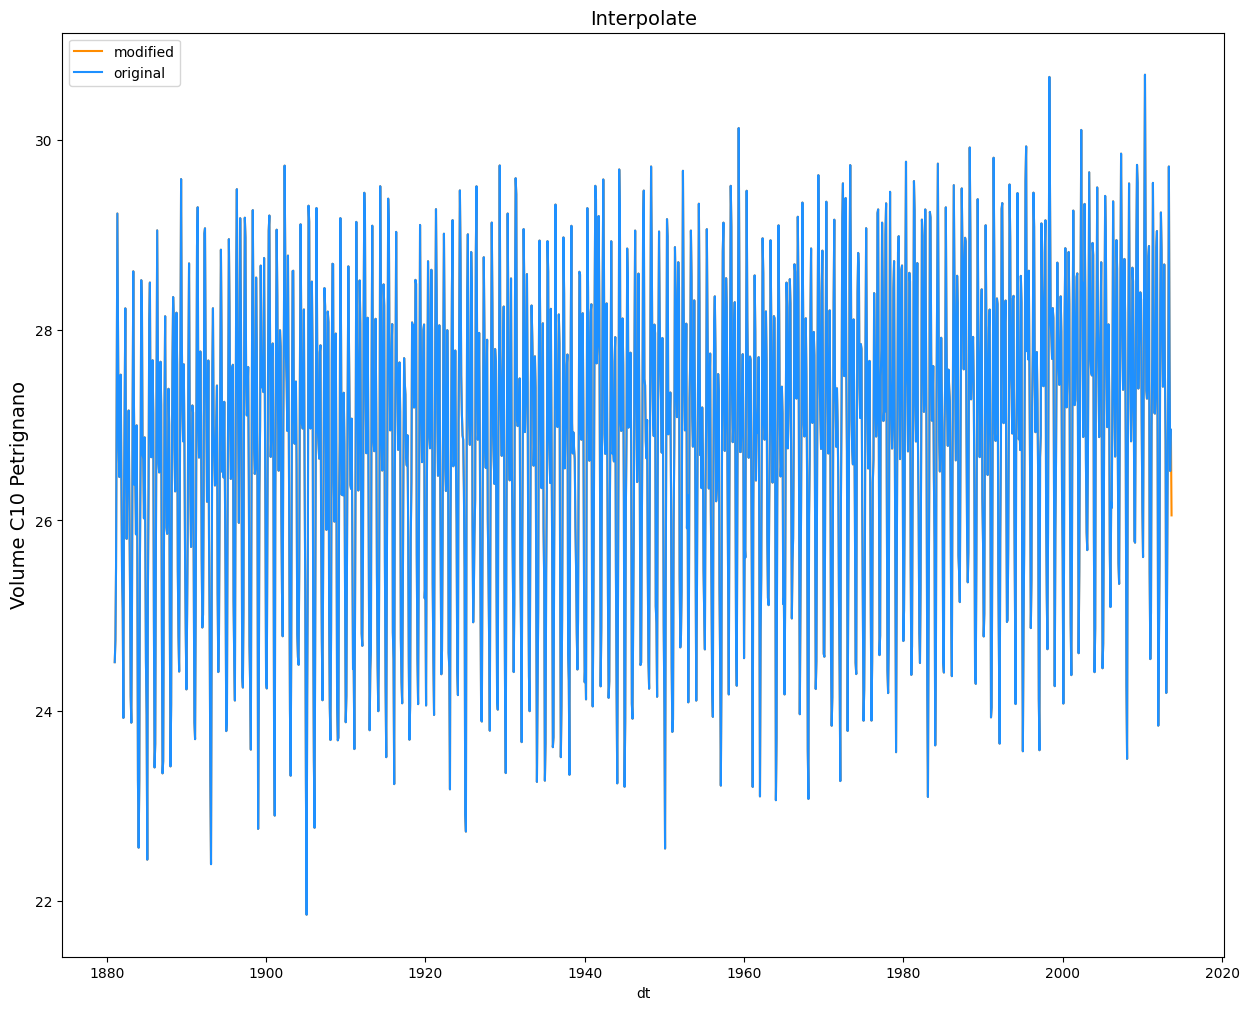

In [10]:
# Handle Null Values
#--Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()#

f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
sns.lineplot(x=df2['dt'], y=df2['Avg_Temp'].interpolate(), ax=ax1, color='darkorange', label = 'modified')
sns.lineplot(x=df2['dt'], y=df2['Avg_Temp'].fillna(np.inf), ax=ax1, color='dodgerblue', label = 'original')
ax1.set_title(f'Interpolate', fontsize=14)
ax1.set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
ax1.set_xlim([dt(1881,1,1), dt(2012,12,1)])
plt.tight_layout()
plt.show()

In [11]:
df2['Avg_Temp']=df2['Avg_Temp'].interpolate()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20036\3892613251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Avg_Temp']=df2['Avg_Temp'].interpolate()


<Axes: xlabel='dt'>

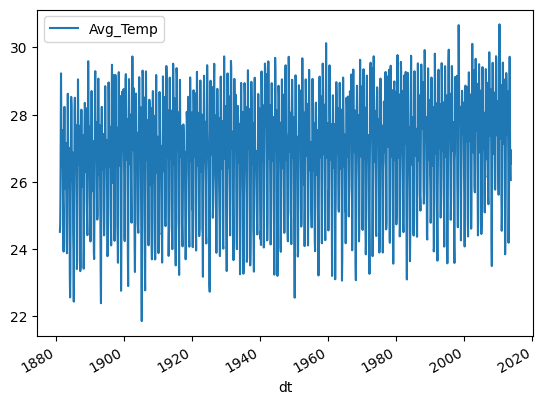

In [12]:
df2.plot(x='dt',y='Avg_Temp')

<Axes: xlabel='dt', ylabel='Avg_Temp'>

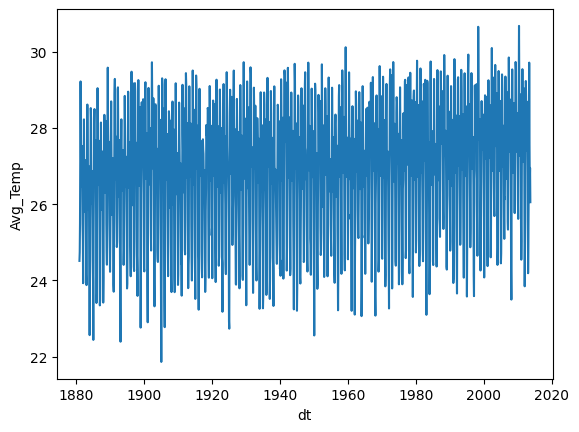

In [13]:
## Plot Using Seaborn
sns.lineplot(df2,x='dt',y='Avg_Temp')

# Decomposition of a Time Series

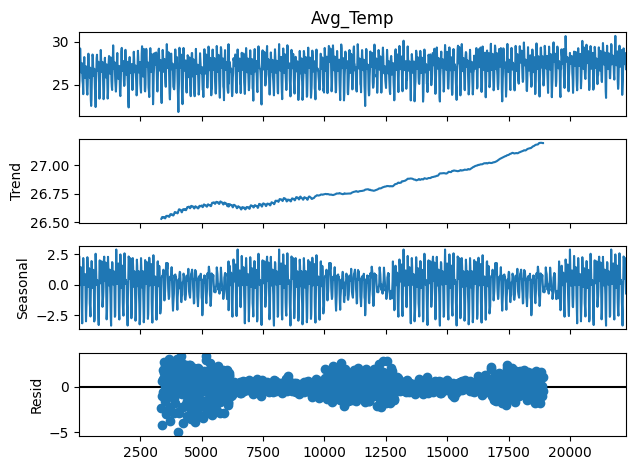

In [18]:
decompose = seasonal_decompose(df2['Avg_Temp'],model='additive', period=480)
decompose.plot()
plt.show()

# Trend & Seasonality

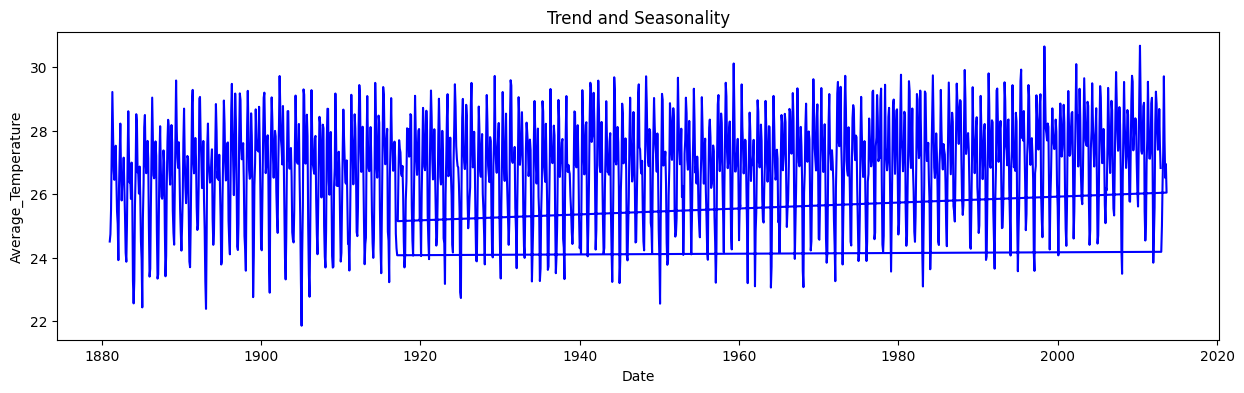

In [19]:
def plot_df(df2, x, y, title="", xlabel='Date', ylabel='Average_Temperature', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df2, x=df2['dt'], y=df2['Avg_Temp'], title='Trend and Seasonality')

In [20]:
# Make Date as Index
df3 = df2.set_index('dt')
df3.head()

,Avg_Temp,City,Country,Latitude,Longitude
dt,,,,,
1881-01-01,24.511,Bombay,India,18.48N,72.68E
1881-02-01,24.744,Bombay,India,18.48N,72.68E
1881-03-01,25.499,Bombay,India,18.48N,72.68E
1881-04-01,27.303,Bombay,India,18.48N,72.68E
1881-05-01,29.224,Bombay,India,18.48N,72.68E


# Checking whether the data is stationary

In [21]:
#Ho: It is non stationary
#H1: It is stationary

from statsmodels.tsa.stattools import adfuller 
def adf_test(df3):
    df3test = adfuller (df3, autolag = 'AIC')
    print("1. ADF: ",df3test[0]) 
    print("2. P-Value: ", df3test [1])
    print("3. Num of Lags: ", df3test [2])
    print("4. Num Of Observations Used For ADF Regression:",df3test[3]) 
    print("5. Critical Values :")
    for key, val in df3test [4].items(): 
        print("\t", key, ":", val)
adf_test(df3['Avg_Temp'])
    
   

1. ADF:  -3.8021084697375453
2. P-Value:  0.0028858161098603225
3. Num of Lags:  23
4. Num Of Observations Used For ADF Regression: 1569
5. Critical Values :
	 1% : -3.434524653155409
	 5% : -2.863383859017768
	 10% : -2.567751638185023


p-value <=0.05 then we reject null hypothesis(data is stationary)

# First we shift by 12 and then by 1 w.r.t 12 (Differencing)

In [22]:
df4=df3.copy()

In [24]:
df4["Combined_12_difference"]=df4['Avg_Temp']-df4['Avg_Temp'].shift(12)
df4

,Avg_Temp,City,Country,Latitude,Longitude,Combined_12_difference
dt,,,,,,
1881-01-01,24.511,Bombay,India,18.48N,72.68E,NaN
1881-02-01,24.744,Bombay,India,18.48N,72.68E,NaN
1881-03-01,25.499,Bombay,India,18.48N,72.68E,NaN
1881-04-01,27.303,Bombay,India,18.48N,72.68E,NaN
1881-05-01,29.224,Bombay,India,18.48N,72.68E,NaN
...,...,...,...,...,...,...
2012-08-01,27.405,Bombay,India,18.48N,72.68E,0.283
2012-09-01,27.491,Bombay,India,18.48N,72.68E,0.101
2012-10-01,28.689,Bombay,India,18.48N,72.68E,-0.175


In [25]:
df4["Combined_1_difference"]=df4["Combined_12_difference"]-df4["Combined_12_difference"].shift(1)
df4

,Avg_Temp,City,Country,Latitude,Longitude,Combined_12_difference,Combined_1_difference
dt,,,,,,,
1881-01-01,24.511,Bombay,India,18.48N,72.68E,NaN,NaN
1881-02-01,24.744,Bombay,India,18.48N,72.68E,NaN,NaN
1881-03-01,25.499,Bombay,India,18.48N,72.68E,NaN,NaN
1881-04-01,27.303,Bombay,India,18.48N,72.68E,NaN,NaN
1881-05-01,29.224,Bombay,India,18.48N,72.68E,NaN,NaN
...,...,...,...,...,...,...,...
2012-08-01,27.405,Bombay,India,18.48N,72.68E,0.283,-0.525
2012-09-01,27.491,Bombay,India,18.48N,72.68E,0.101,-0.182
2012-10-01,28.689,Bombay,India,18.48N,72.68E,-0.175,-0.276


In [26]:
df4.head()

,Avg_Temp,City,Country,Latitude,Longitude,Combined_12_difference,Combined_1_difference
dt,,,,,,,
1881-01-01,24.511,Bombay,India,18.48N,72.68E,NaN,NaN
1881-02-01,24.744,Bombay,India,18.48N,72.68E,NaN,NaN
1881-03-01,25.499,Bombay,India,18.48N,72.68E,NaN,NaN
1881-04-01,27.303,Bombay,India,18.48N,72.68E,NaN,NaN
1881-05-01,29.224,Bombay,India,18.48N,72.68E,NaN,NaN


In [27]:
adftest = adfuller(df4["Combined_1_difference"].dropna())
adftest

(-14.350675235985173,
 1.0230088342984349e-26,
 24,
 1555,
 {'1%': -3.4345623007753496,
  '5%': -2.8634004754910296,
  '10%': -2.567760486450719},
 3155.490049569657)

Time series is Stationary. (After differencing lag 1)

# First shift by 1 then by 12 (Differencing)

In [28]:
df5=df3.copy()

In [29]:
df5['Avg_Temp_1_difference']=df5['Avg_Temp']-df5['Avg_Temp'].shift(1)

In [30]:
df5['Avg_Temp_12_difference']=df5['Avg_Temp']-df5['Avg_Temp'].shift(12)

In [31]:
adfuller(df5["Avg_Temp_12_difference"].dropna())

(-11.739401572671465,
 1.284410243719617e-21,
 24,
 1556,
 {'1%': -3.4345595891554566,
  '5%': -2.863399278674411,
  '10%': -2.5677598491451947},
 3036.262063660525)

<Axes: xlabel='dt'>

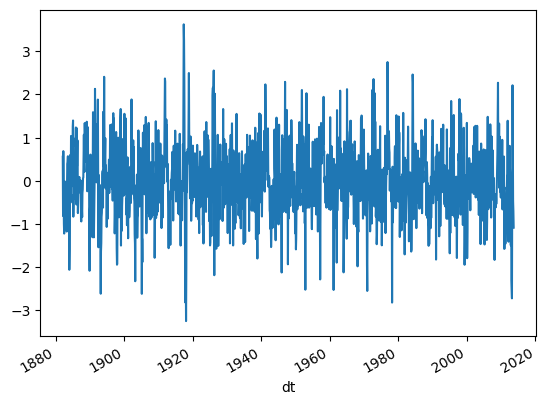

In [32]:
df5["Avg_Temp_12_difference"].plot()

# ACF and PACF Graph

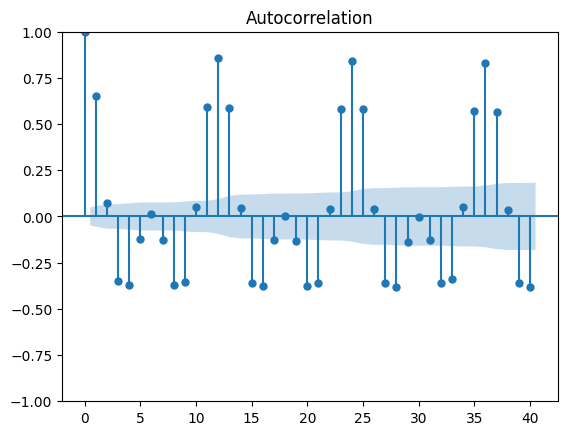

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(df3["Avg_Temp"].dropna(),lags=40)

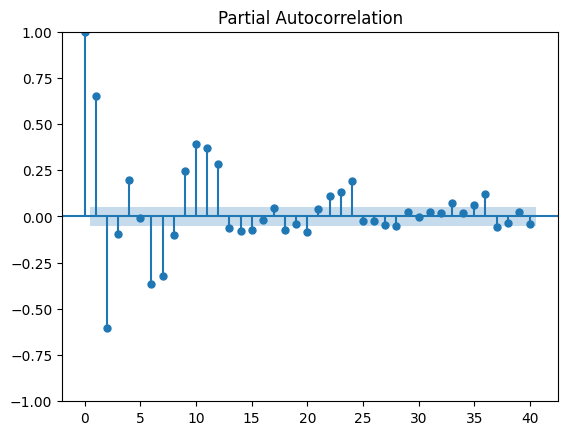

In [34]:
pacf = plot_pacf(df3["Avg_Temp"].dropna(),lags=40)

AR value so p=3

In [35]:
from pmdarima.arima import auto_arima
model = auto_arima(df3['Avg_Temp'], seasonal=True, m=12, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3377.322, Time=2.89 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5427.197, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3949.111, Time=0.45 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4730.201, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5425.199, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3993.971, Time=2.87 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=3827.407, Time=2.55 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3374.680, Time=7.82 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=3643.637, Time=6.66 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=3380.161, Time=8.15 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3374.895, Time=7.16 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=6.32 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=8.98 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=3263.904, Time=7.93 sec
 ARIMA(3,1,2)(1,0,1)[12] inte

In [36]:
#for non-seasonal data
import statsmodels.api as sm


In [37]:
model=sm.tsa.arima.ARIMA(df3['Avg_Temp'],order=(3,1,2))
model_fit=model.fit()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is no

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Avg_Temp   No. Observations:                 1593
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2094.160
Date:                Mon, 15 May 2023   AIC                           4200.321
Time:                        11:43:59   BIC                           4232.557
Sample:                             0   HQIC                          4212.294
                               - 1593                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0509      0.028     37.971      0.000       0.997       1.105
ar.L2         -1.0507      0.028    -37.888      0.000      -1.105      -0.996
ar.L3          0.0535      0.028      1.946      0.052      -0.000       0.107
ma.L1         -0.9256      0.010    -90.825      0.000      -0.946      -0.906
ma.L2          0.9338      0.008    114.232      0.000       0.918       0.950
sigma2         0.8107      0.028     28.807      0.000       0.756       0.866
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 7.74
Prob(Q):                              0.84   Prob(JB):                         0.02
Heteroskedasticity (H):               0.85   Skew:                             0.15
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='dt'>

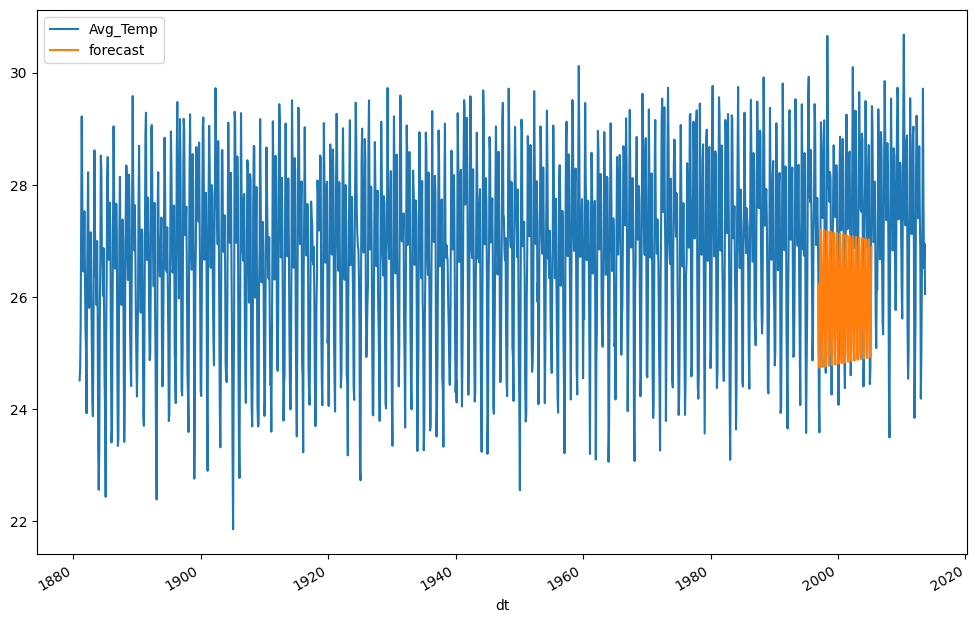

In [43]:
df3['forecast']=model_fit.predict(start=1400,end=1500,dynamic=True)
df3[['Avg_Temp','forecast']].plot(figsize=(12,8))

In [44]:
import statsmodels.api as sm

In [45]:
model=sm.tsa.statespace.SARIMAX(df3['Avg_Temp'],order=(3,1,2),seasonal_order=(3,1,2,12))
results=model.fit()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is no

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Avg_Temp   No. Observations:                 1593
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1484.749
Date:                            Mon, 15 May 2023   AIC                           2991.497
Time:                                    11:50:38   BIC                           3050.514
Sample:                                         0   HQIC                          3013.426
                                           - 1593                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5320      0.021    -25.133      0.000      -0.573      -0.491
ar.L2          0.4103      0.022     18.997      0.000       0.368       0.453
ar.L3         -0.0224      0.022     -1.024      0.306      -0.065       0.020
ma.L1         -0.0025      5.404     -0.000      1.000     -10.594      10.589
ma.L2         -0.9975      5.391     -0.185      0.853     -11.563       9.568
ar.S.L12      -0.1544      1.211     -0.128      0.899      -2.528       2.219
ar.S.L24      -0.0066      0.088     -0.075      0.940      -0.179       0.166
ar.S.L36       0.0284      0.051      0.553      0.580      -0.072       0.129
ma.S.L12      -0.5708      1.210     -0.472      0.637      -2.942       1.800
ma.S.L24      -0.0878      0.802     -0.109      0.913      -1.660       1.484
sigma2         0.3792      2.049      0.185      0.853      -3.638       4.396
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               103.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='dt'>

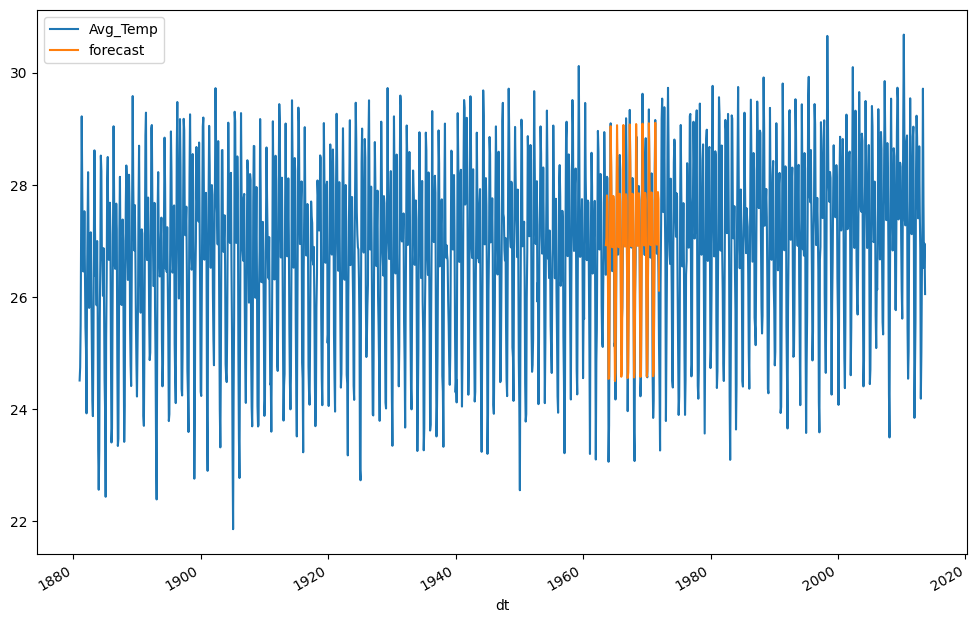

In [47]:
df3['forecast'] = results.predict(start = 1000, end= 1100, dynamic= True)  
df3[['Avg_Temp', 'forecast']].plot(figsize=(12, 8))

In [48]:
from pandas.tseries.offsets import DateOffset

In [49]:
future_dates=[df3.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [50]:
future_datest_df3=pd.DataFrame(index=future_dates[1:],columns=df3.columns)

In [51]:
future_datest_df3.tail()

,Avg_Temp,City,Country,Latitude,Longitude,forecast
2014-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
future_df3=pd.concat([df3,future_datest_df3])

<Axes: >

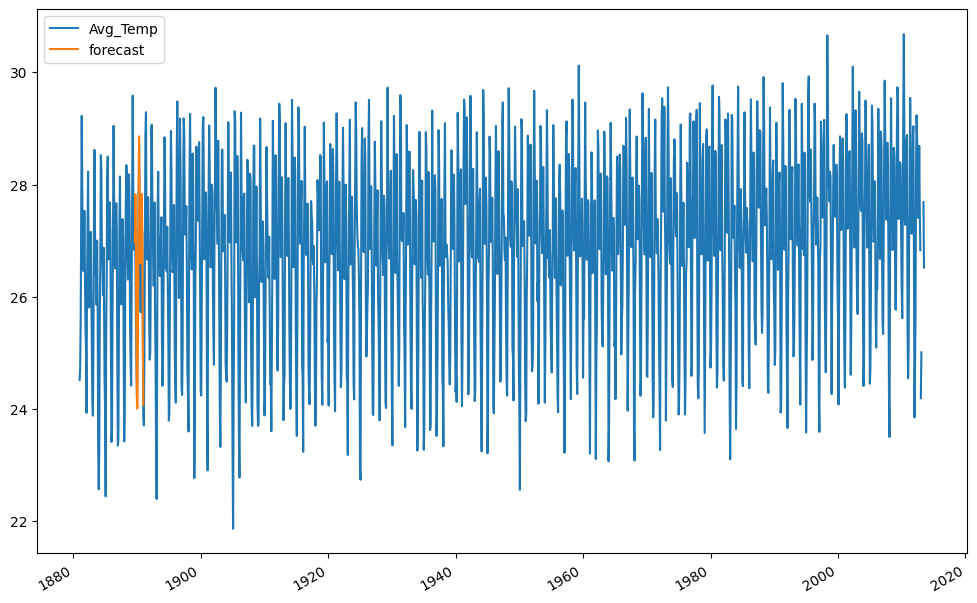

In [78]:
future_df3['forecast']=results.predict(start=104,end=120,dynamic=True)
future_df3[['Avg_Temp','forecast']].plot(figsize=(12,8))

In [ ]:
#T

In [23]:
df6=df3.copy()

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [69]:
model=sm.tsa.statespace.SARIMAX(df2['Avg_Temp'],order=(3,1,2),seasonal_order=(3,1,2,12))
results=model.fit()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Avg_Temp   No. Observations:                 1593
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1484.749
Date:                            Mon, 15 May 2023   AIC                           2991.497
Time:                                    19:53:05   BIC                           3050.514
Sample:                                         0   HQIC                          3013.426
                                           - 1593                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5320      0.021    -25.133      0.000      -0.573      -0.491
ar.L2          0.4103      0.022     18.997      0.000       0.368       0.453
ar.L3         -0.0224      0.022     -1.024      0.306      -0.065       0.020
ma.L1         -0.0025      5.404     -0.000      1.000     -10.594      10.589
ma.L2         -0.9975      5.391     -0.185      0.853     -11.563       9.568
ar.S.L12      -0.1544      1.211     -0.128      0.899      -2.528       2.219
ar.S.L24      -0.0066      0.088     -0.075      0.940      -0.179       0.166
ar.S.L36       0.0284      0.051      0.553      0.580      -0.072       0.129
ma.S.L12      -0.5708      1.210     -0.472      0.637      -2.942       1.800
ma.S.L24      -0.0878      0.802     -0.109      0.913      -1.660       1.484
sigma2         0.3792      2.049      0.185      0.853      -3.638       4.396
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               103.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prediction of combined value

In [27]:
from datetime import datetime,timedelta
df6['pred_Sarima'] = results.predict(start = datetime(1881,1,1),end = datetime(2012,12,1))
df6['pred_Sarima']

dt
1881-01-01     0.000000
1881-02-01    24.510997
1881-03-01    24.743998
1881-04-01    25.498999
1881-05-01    27.302999
                ...    
2012-08-01    27.483613
2012-09-01    27.696289
2012-10-01    28.616565
2012-11-01    28.707000
2012-12-01    26.021080
Name: pred_Sarima, Length: 1593, dtype: float64

Residuals

In [28]:
df6['residuals'] = df6["Avg_Temp"]-df6['pred_Sarima']
df6['residuals']

dt
1881-01-01    24.511000
1881-02-01     0.233003
1881-03-01     0.755002
1881-04-01     1.804001
1881-05-01     1.921001
                ...    
2012-08-01    -0.078613
2012-09-01    -0.205289
2012-10-01     0.072435
2012-11-01    -1.167000
2012-12-01     0.806920
Name: residuals, Length: 1593, dtype: float64

In [29]:
df6

,Avg_Temp,City,Country,Latitude,Longitude,pred_Sarima,residuals
dt,,,,,,,
1881-01-01,24.511,Bombay,India,18.48N,72.68E,0.000000,24.511000
1881-02-01,24.744,Bombay,India,18.48N,72.68E,24.510997,0.233003
1881-03-01,25.499,Bombay,India,18.48N,72.68E,24.743998,0.755002
1881-04-01,27.303,Bombay,India,18.48N,72.68E,25.498999,1.804001
1881-05-01,29.224,Bombay,India,18.48N,72.68E,27.302999,1.921001
...,...,...,...,...,...,...,...
2012-08-01,27.405,Bombay,India,18.48N,72.68E,27.483613,-0.078613
2012-09-01,27.491,Bombay,India,18.48N,72.68E,27.696289,-0.205289
2012-10-01,28.689,Bombay,India,18.48N,72.68E,28.616565,0.072435


<Axes: ylabel='Density'>

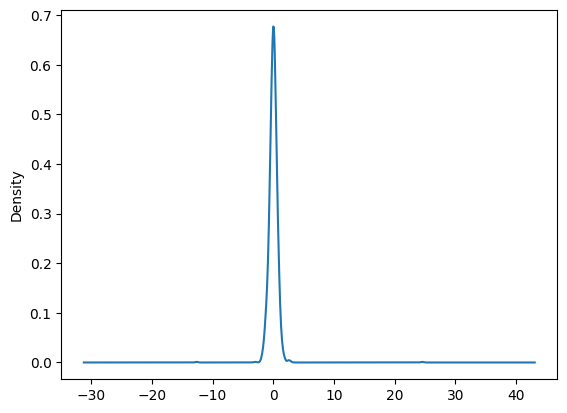

In [30]:
results.resid.plot(kind='kde')

In [31]:
from scipy import stats
stats.shapiro(df6["residuals"])

ShapiroResult(statistic=0.5625731945037842, pvalue=0.0)

Ho: Data is from Normal Distribution
v/s
H1: Data is not from Normal Distribution


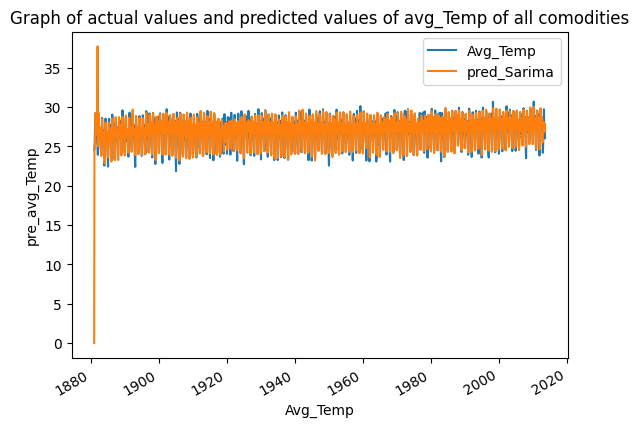

In [32]:
df6[['Avg_Temp','pred_Sarima']].plot()
plt.title('Graph of actual values and predicted values of avg_Temp of all comodities')
plt.xlabel('Avg_Temp')
plt.ylabel('pre_avg_Temp')
plt.show()

The Original dataset and our predicted values are almost same

# Prediction from Jan 2011 to Dec 2012

In [33]:
df6.tail()

,Avg_Temp,City,Country,Latitude,Longitude,pred_Sarima,residuals
dt,,,,,,,
2012-08-01,27.405,Bombay,India,18.48N,72.68E,27.483613,-0.078613
2012-09-01,27.491,Bombay,India,18.48N,72.68E,27.696289,-0.205289
2012-10-01,28.689,Bombay,India,18.48N,72.68E,28.616565,0.072435
2012-11-01,27.540,Bombay,India,18.48N,72.68E,28.707000,-1.167000
2012-12-01,26.828,Bombay,India,18.48N,72.68E,26.021080,0.806920


In [34]:
df6.shape

(1593, 7)

In [35]:
df61=df6.iloc[1569:1593,0:1]
df61

,Avg_Temp
dt,
2011-01-01,24.543
2011-02-01,25.031
2011-03-01,26.990
2011-04-01,27.716
2011-05-01,29.546
2011-06-01,28.394
2011-07-01,27.133
2011-08-01,27.122
2011-09-01,27.390


In [36]:
pred_Sarima1 = results.predict(start = datetime(2011,1,1),end = datetime(2012,12,1))
pred_Sarima1

dt
2011-01-01    24.717002
2011-02-01    24.880233
2011-03-01    26.830053
2011-04-01    28.647427
2011-05-01    29.505637
2011-06-01    28.760425
2011-07-01    27.277155
2011-08-01    27.179484
2011-09-01    27.544365
2011-10-01    28.581694
2011-11-01    28.590863
2011-12-01    26.800204
2012-01-01    25.325393
2012-02-01    24.628590
2012-03-01    26.753063
2012-04-01    27.770110
2012-05-01    29.843944
2012-06-01    28.474775
2012-07-01    27.507841
2012-08-01    27.483613
2012-09-01    27.696289
2012-10-01    28.616565
2012-11-01    28.707000
2012-12-01    26.021080
Name: predicted_mean, dtype: float64

In [37]:
df61['pred_Sarima1'] = pred_Sarima1

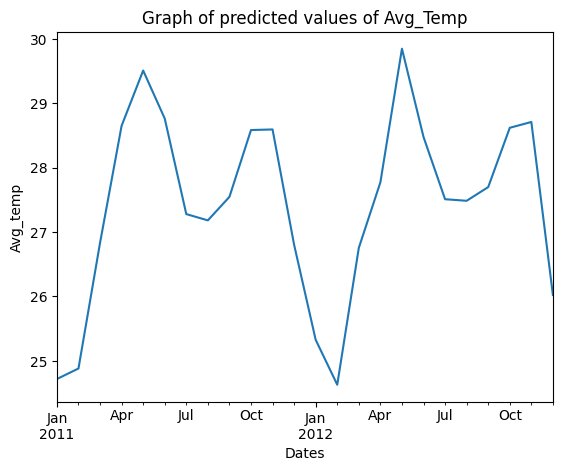

In [38]:
pred_Sarima1.plot()
plt.title('Graph of predicted values of Avg_Temp')
plt.xlabel('Dates')
plt.ylabel('Avg_temp')
plt.show()

In [39]:
df6['pred_Sarima1'] = pred_Sarima1

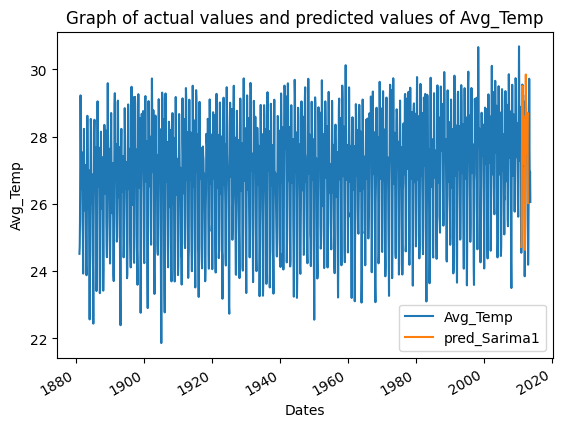

In [40]:
df6[['Avg_Temp','pred_Sarima1']].plot()
plt.title('Graph of actual values and predicted values of Avg_Temp')
plt.xlabel('Dates')
plt.ylabel('Avg_Temp')
plt.show()

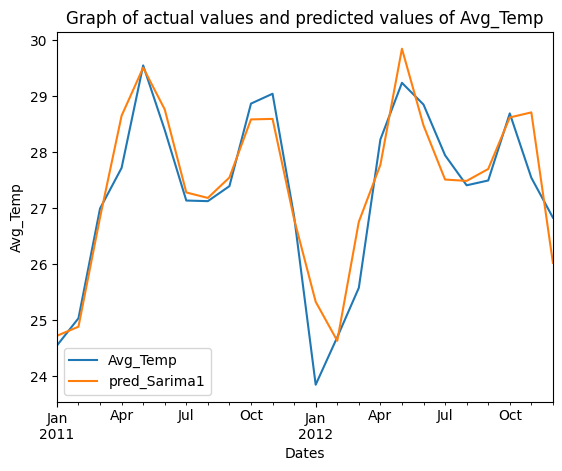

In [41]:
df61[['Avg_Temp','pred_Sarima1']].plot()
plt.title('Graph of actual values and predicted values of Avg_Temp')
plt.xlabel('Dates')
plt.ylabel('Avg_Temp')
plt.show()

# Future prediction from June 2013 to Dec 2014

In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1593 entries, 1881-01-01 to 2012-12-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Avg_Temp   1593 non-null   float64
 1   City       1593 non-null   object 
 2   Country    1593 non-null   object 
 3   Latitude   1593 non-null   object 
 4   Longitude  1593 non-null   object 
dtypes: float64(1), object(4)
memory usage: 139.2+ KB


In [62]:
pred_Sarima2 = results.predict(start = dt.datetime(2012,1,1),end = dt.datetime(2012,1,5))
pred_Sarima2

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [71]:
start_date = dt.datetime(2013, 1, 1)
end_date = dt.datetime(2014, 12, 1)

# Generate predictions
pred_Sarima2 = results.predict(start=start_date, end=end_date)
print(pred_Sarima2)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
pred_Sarima2.plot()
plt.title('Graph of future predicted values of CPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('CPI Values')
plt.show()